In [ ]:
!pip install mlxtend

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Here, we can see some of the columns are in object and some are integers, we have to encode the objects and labels, but before that lets see the spread of the dataset of the columns

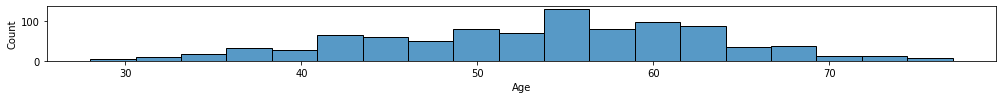

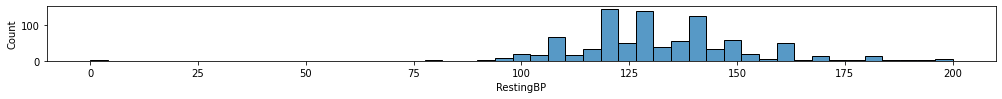

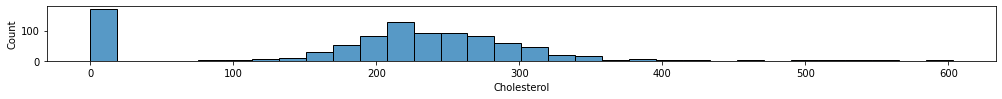

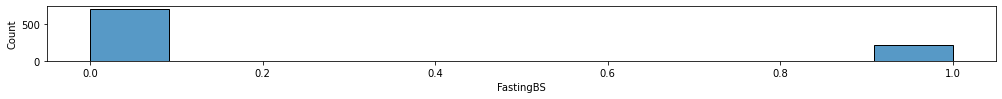

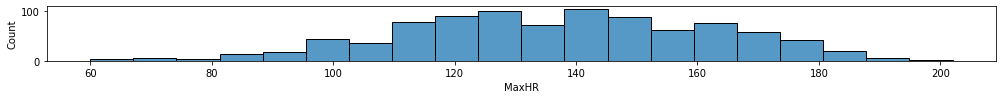

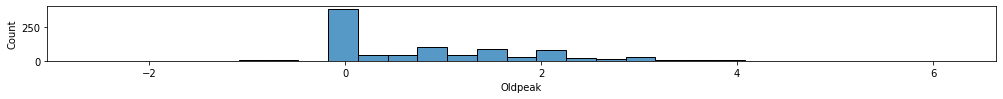

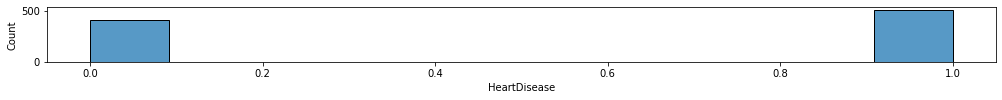

In [ ]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
  plt.figure(figsize=(17,1))
  sns.histplot(data=df1, x=column)

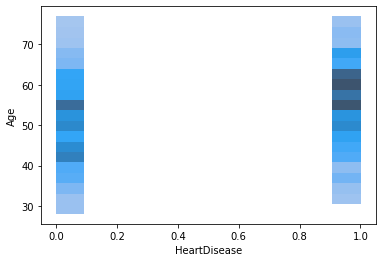

In [ ]:
sns.histplot(data=df1, x='HeartDisease', y='Age',kde=True)

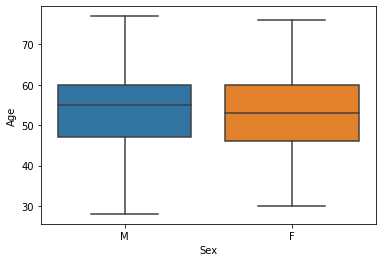

In [ ]:
sns.boxplot(data=df, x='Sex', y='Age')

Now we do encoding the dataset, especially where the classes are labels.

In [ ]:
x_list = ['Sex', 'ExerciseAngina', 'ST_Slope', 'ChestPainType', 'RestingECG']

gle = LabelEncoder()

for x in x_list:
  column_labels = gle.fit_transform(df[x])
  df[x] = column_labels
  column_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
  print('Column name: ', x)
  print(column_mappings)



Column name:  Sex
{0: 'F', 1: 'M'}
Column name:  ExerciseAngina
{0: 'N', 1: 'Y'}
Column name:  ST_Slope
{0: 'Down', 1: 'Flat', 2: 'Up'}
Column name:  ChestPainType
{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}
Column name:  RestingECG
{0: 'LVH', 1: 'Normal', 2: 'ST'}


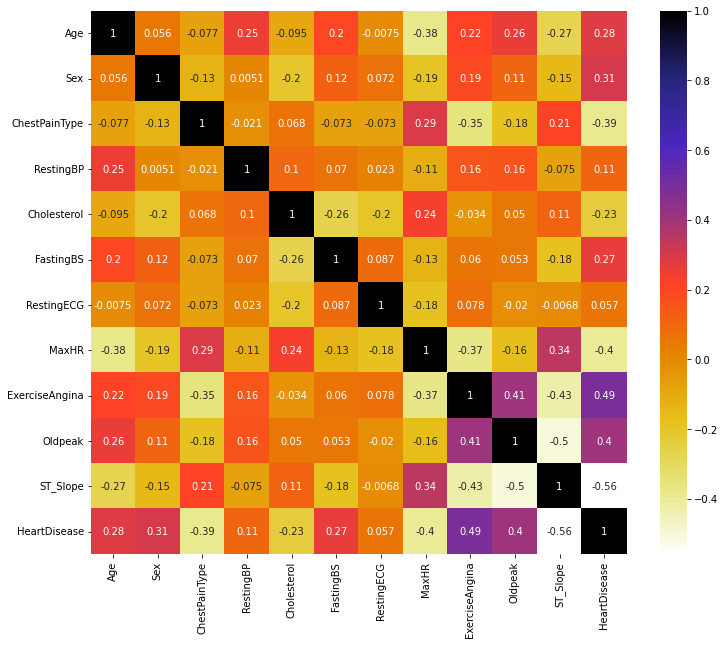

In [ ]:
#Using Pearson Correlation to see if the features are correlated 
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

From the pearson correlation plot, we can see all the classes are significanty related to the HeartDisease, no classes are significantly related with each other for drop out. 

In [ ]:
df.info(null_counts=True) #seeing the datatypes along with if any data is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
df.duplicated() # seeing if any column is being duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [ ]:
for col in df.columns:
  print(col , np.unique(df[col]))
  print(df[col].value_counts())

Age [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
Sex [0 1]
1    725
0    193
Name: Sex, dtype: int64
ChestPainType [0 1 2 3]
0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64
RestingBP [  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 1

Now we are going to see the outliers, and remove them using the median of the value

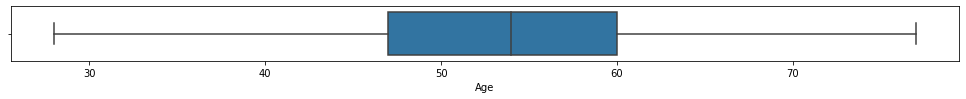

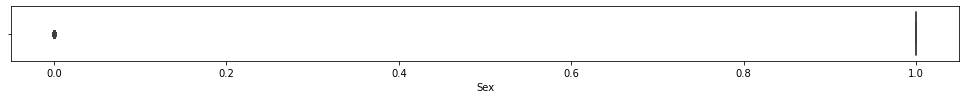

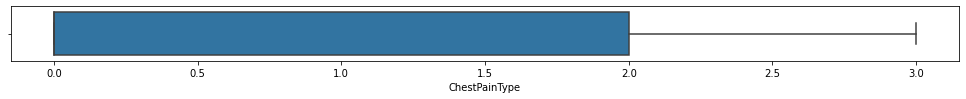

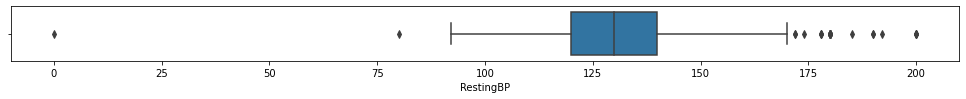

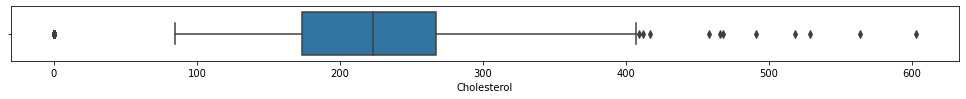

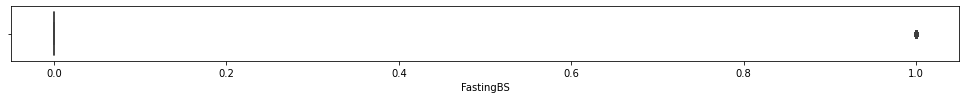

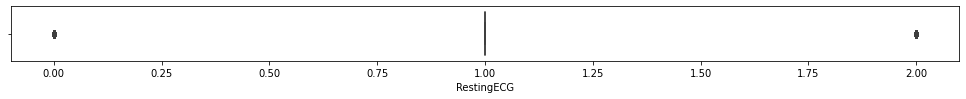

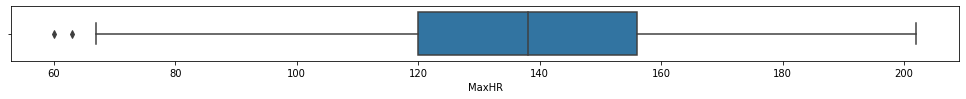

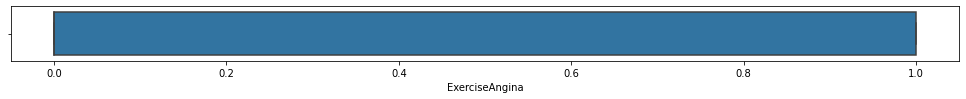

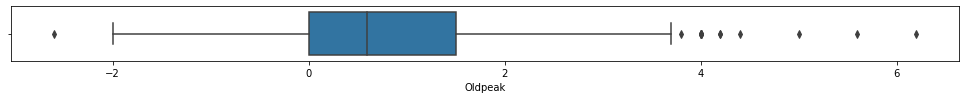

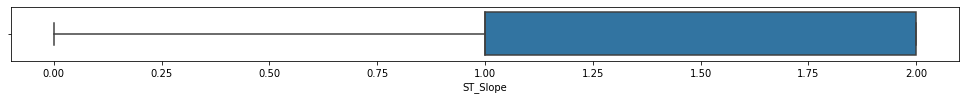

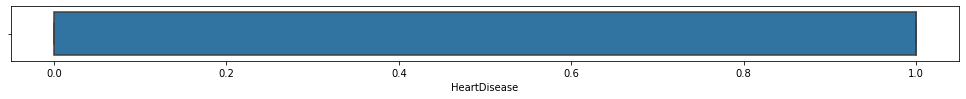

In [ ]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [ ]:
columns_with_outliers = ['Oldpeak', 'Cholesterol', 'RestingBP', 'MaxHR'] # these are the columns with outliers and removing them with median

In [ ]:
for column in columns_with_outliers:
  print('column name: ', column)
  print(df[column].quantile(0.02))  # see the data which does not fit with the 98 percent confidence level
  print(df[column].quantile(.98))
  print('-------------')

column name:  Oldpeak
0.0
3.6
-------------
column name:  Cholesterol
0.0
384.65999999999997
-------------
column name:  RestingBP
100.0
180.0
-------------
column name:  MaxHR
84.0
183.31999999999994
-------------


In [ ]:
for column in columns_with_outliers: #assigning median values for the outliers
  print('column name: ', column)
  print(df[column].quantile(0.02)) 
  print(df[column].quantile(.98))
  print('-------------')
  for row in range(len(df[column])):
    if df[column][row] <= df[column].quantile(0.02) or df[column][row] >= df[column].quantile(.98):
      df[column][row] = np.median(df[column])

column name:  Oldpeak
0.0
3.6
-------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


column name:  Cholesterol
0.0
384.65999999999997
-------------
column name:  RestingBP
100.0
180.0
-------------
column name:  MaxHR
84.0
183.31999999999994
-------------


seeing the spread of the data again

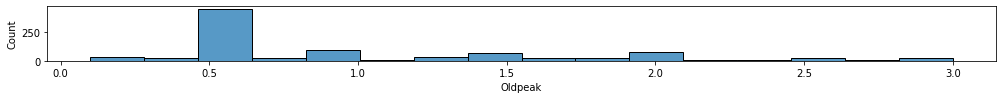

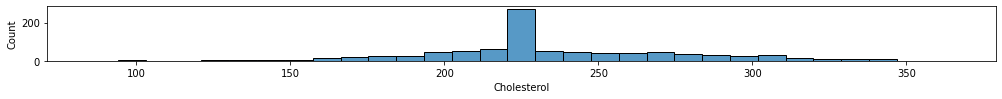

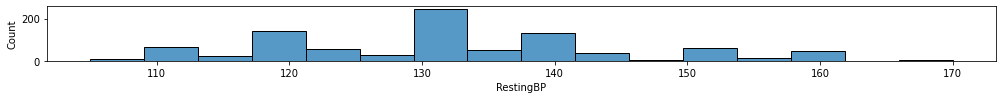

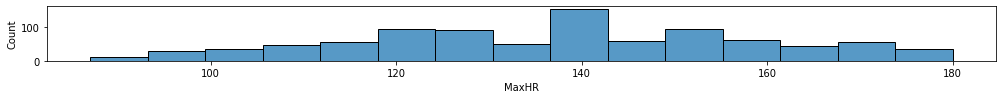

In [ ]:
for column in columns_with_outliers:
  plt.figure(figsize=(17,1))
  sns.histplot(data=df, x=column)

In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,131.942266,235.059913,0.233115,0.989107,137.152505,0.404139,1.036492,1.361656,0.553377
std,9.432617,0.407701,0.956519,12.997942,39.699247,0.423046,0.631671,21.213683,0.490992,0.676065,0.607056,0.497414
min,28.000000,0.000000,0.000000,105.000000,85.000000,0.000000,0.000000,87.000000,0.000000,0.100000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,216.000000,0.000000,1.000000,121.000000,0.000000,0.600000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,260.000000,0.000000,1.000000,152.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,365.000000,1.000000,2.000000,180.000000,1.000000,3.000000,2.000000,1.000000


In [ ]:
columns_to_scale = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP', 'Age'] # slacing the columns with min max scaler except the labelled class
scaler=MinMaxScaler((-1,1)) #normalizes the data which makes the model less bais
#transform only the awaiting time and age.
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
features=df[['Age', 'Sex', 'ChestPainType','ST_Slope', 'Oldpeak', 'ExerciseAngina', 'MaxHR', 'FastingBS', 'Cholesterol', 'RestingBP']]
target=df.loc[:,'HeartDisease'].values

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.3,random_state=0)#splitting data in 70% train, 30%test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # training the model using KNN classifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred=neigh.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       113
           1       0.84      0.88      0.86       163

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276


 F1:
 0.858858858858859

 Precision score is:
 0.8411764705882353

 Recall score is:
 0.8773006134969326

 Confusion Matrix:



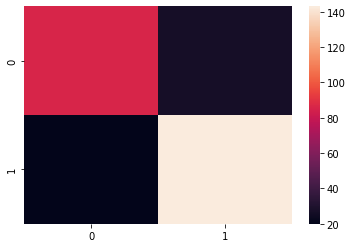

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [ ]:
from sklearn.svm import SVC # training with the SVC classifier which already has the RBF kernel as default
clf = SVC()
clf.fit(X_train, y_train) 

SVC()

In [ ]:
clf_predict=clf.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       113
           1       0.84      0.85      0.85       163

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276


 F1:
 0.8475609756097561

 Precision score is:
 0.8424242424242424

 Recall score is:
 0.852760736196319

 Confusion Matrix:



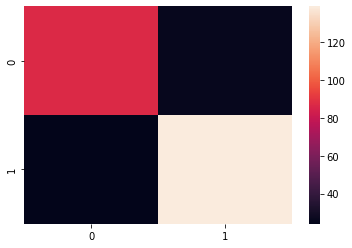

In [ ]:
print("Classification Report is:\n",classification_report(y_test,clf_predict))
print("\n F1:\n",f1_score(y_test,clf_predict))
print("\n Precision score is:\n",precision_score(y_test,clf_predict))
print("\n Recall score is:\n",recall_score(y_test,clf_predict))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,clf_predict))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100, 120],
    'min_samples_split': [2, 3, 4],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1")

In [ ]:
best_model=grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [ ]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       113
           1       0.86      0.82      0.84       163

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276


 F1:
 0.8401253918495297

 Precision score is:
 0.8589743589743589

 Recall score is:
 0.8220858895705522

 Confusion Matrix:



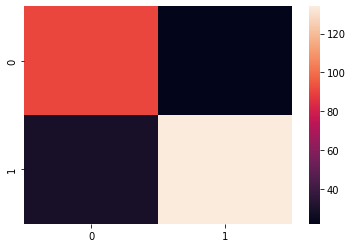

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

In [ ]:
print('Best Criterion:',  best_model.best_estimator_)

Best Criterion: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)


Finding the best parameters for the decision tree using grid search cv

In [ ]:
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier(n_neighbors=5)
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20, random_state=42)
XGB = XGBClassifier()


In [ ]:
models = list()
models.append(('SVM', SVM))
models.append(('KNC', KNC))
models.append(('DTC', DTC))
models.append(('XGB', XGB))
# define the hard voting ensemble
ensemble = VotingClassifier(estimators=models, voting='hard')
# fit the model on all available data
ensemble.fit(X_train, y_train)

predicted_result = ensemble.predict(X_test)

using hard voting approach for the ensemble method, which ensures majority voting component

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       113
           1       0.85      0.84      0.85       163

    accuracy                           0.82       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.82      0.82      0.82       276


 F1:
 0.845679012345679

 Precision score is:
 0.8509316770186336

 Recall score is:
 0.8404907975460123

 Confusion Matrix:



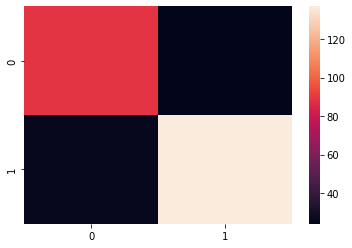

In [ ]:
print("Classification Report is:\n",classification_report(y_test, predicted_result))
print("\n F1:\n",f1_score(y_test, predicted_result))
print("\n Precision score is:\n", precision_score(y_test, predicted_result))
print("\n Recall score is:\n", recall_score(y_test, predicted_result))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, predicted_result))

Now will be training a neural network with 3 dense layers, with 2 relu activation layer and the last layer is sigmoid for classification. For the first layer use 32 neurons, for the next layer use 16 and for the output use 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_cols, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



model.fit(X_train, y_train, batch_size=16, epochs=25, verbose=1, validation_data=(X_train, y_train))

Epoch 1/25
41/41 [==============================] - 3s 29ms/step - loss: 0.5833 - accuracy: 0.7960 - val_loss: 0.5198 - val_accuracy: 0.8193
Epoch 2/25
41/41 [==============================] - 0s 8ms/step - loss: 0.4814 - accuracy: 0.8240 - val_loss: 0.4426 - val_accuracy: 0.8224
Epoch 3/25
41/41 [==============================] - 0s 9ms/step - loss: 0.4264 - accuracy: 0.8162 - val_loss: 0.4046 - val_accuracy: 0.8302
Epoch 4/25
41/41 [==============================] - 0s 8ms/step - loss: 0.3976 - accuracy: 0.8333 - val_loss: 0.3857 - val_accuracy: 0.8333
Epoch 5/25
41/41 [==============================] - 0s 9ms/step - loss: 0.3814 - accuracy: 0.8349 - val_loss: 0.3700 - val_accuracy: 0.8349
Epoch 6/25
41/41 [==============================] - 0s 11ms/step - loss: 0.3676 - accuracy: 0.8380 - val_loss: 0.3576 - val_accuracy: 0.8505
Epoch 7/25
41/41 [==============================] - 0s 9ms/step - loss: 0.3557 - accuracy: 0.8474 - val_loss: 0.3487 - val_accuracy: 0.8660
Epoch 8/25
41/41 [

In [ ]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

9/9 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8478
Accuracy: 0.8478260636329651


In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(yhat_probs).astype(int)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

print("Classification Report is:\n",classification_report(y_test,yhat_classes))
print("\n F1:\n",f1_score(y_test,yhat_classes))
print("\n Precision score is:\n",precision_score(y_test,yhat_classes))
print("\n Recall score is:\n",recall_score(y_test,yhat_classes))
print("\n Accuracy score is:\n", accuracy_score(y_test,yhat_classes))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, yhat_classes))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       113
           1       0.87      0.88      0.87       163

    accuracy                           0.85       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276


 F1:
 0.8719512195121951

 Precision score is:
 0.8666666666666667

 Recall score is:
 0.8773006134969326

 Accuracy score is:
 0.8478260869565217

 Confusion Matrix:
 [[ 91  22]
 [ 20 143]]


Instead of the Relu activation here we are using tanh as the activation for the same model

In [ ]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(n_cols, )))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=25, verbose=1, validation_data=(X_train, y_train))

Epoch 1/25
41/41 [==============================] - 2s 20ms/step - loss: 0.6263 - accuracy: 0.6745 - val_loss: 0.5128 - val_accuracy: 0.8037
Epoch 2/25
41/41 [==============================] - 0s 11ms/step - loss: 0.4717 - accuracy: 0.8069 - val_loss: 0.4304 - val_accuracy: 0.8224
Epoch 3/25
41/41 [==============================] - 0s 7ms/step - loss: 0.4172 - accuracy: 0.8178 - val_loss: 0.3999 - val_accuracy: 0.8240
Epoch 4/25
41/41 [==============================] - 0s 7ms/step - loss: 0.3937 - accuracy: 0.8271 - val_loss: 0.3884 - val_accuracy: 0.8349
Epoch 5/25
41/41 [==============================] - 0s 5ms/step - loss: 0.3845 - accuracy: 0.8318 - val_loss: 0.3781 - val_accuracy: 0.8333
Epoch 6/25
41/41 [==============================] - 0s 8ms/step - loss: 0.3762 - accuracy: 0.8349 - val_loss: 0.3764 - val_accuracy: 0.8411
Epoch 7/25
41/41 [==============================] - 0s 8ms/step - loss: 0.3744 - accuracy: 0.8427 - val_loss: 0.3657 - val_accuracy: 0.8536
Epoch 8/25
41/41 [

In [ ]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

9/9 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8442
Accuracy: 0.8442028760910034


In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(yhat_probs).astype(int)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

print("Classification Report is:\n",classification_report(y_test,yhat_classes))
print("\n F1:\n",f1_score(y_test,yhat_classes))
print("\n Precision score is:\n",precision_score(y_test,yhat_classes))
print("\n Recall score is:\n",recall_score(y_test,yhat_classes))
print("\n Accuracy score is:\n", accuracy_score(y_test,yhat_classes))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, yhat_classes))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       113
           1       0.86      0.88      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276


 F1:
 0.8700906344410877

 Precision score is:
 0.8571428571428571

 Recall score is:
 0.8834355828220859

 Accuracy score is:
 0.8442028985507246

 Confusion Matrix:
 [[ 89  24]
 [ 19 144]]


For the neural network both models had the same metrics. Therefore, it can be understood that the neural network is fully optimized and cannot be improved more with changing the activation functions.

As for the results, we can see in terms of F1 score, the neural network produced 87 percent, the ensemble method have 84 percent. Therefore, the nueral network is a better model in terms of F1 score. Also, we can see the F1 score of all the models, which are really good, thus none of the models are overfitting. In terms of precision also neural network does better by 86 percent while ensemble produced 85, in terms of Recall, neural network does 87 while ensemble does 84. In terms of accuracy neural network is also ahead as it is 85 and the accuracy of ensemble method is 82. Another special mention will be KNN classifer individually with F1 86 percent, recall 87 percent, precision is 84 percent and accuracy is 83. Therefore, Neural Network is the best model here in terms of all the scores.